<a href="https://colab.research.google.com/github/M-pranav-7/Sentiment-Analysis-/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas


In [ ]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install nltk
!pip install seaborn

In [34]:
pip install flask


In [ ]:
#Importing necessary libraries

import numpy as np ## scientific computation
import pandas as pd ## loading dataset file
import matplotlib.pyplot as plt ## Visulization
import nltk  ## Preprocessing Reviews
nltk.download('stopwords') ##Downloading stopwords
from nltk.corpus import stopwords ## removing all the stop words
from nltk.stem.porter import PorterStemmer ## stemming of words
import re  ## To use Regular expression

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset = pd.read_csv("Restaurant_Reviews.tsv",delimiter = "\t",quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


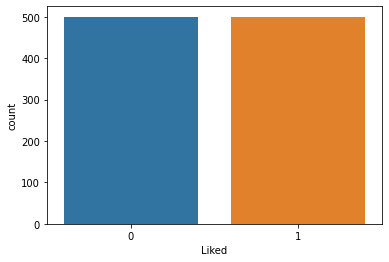

In [ ]:
import seaborn as sns
sns.countplot('Liked',data=dataset)



In [ ]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = []
for i in range(0,1000):   #we have 1000 reviews
    review = re.sub('[^a-zA-Z]'," ",dataset["Review"][i]) #sub can replace anything in a text with anything #replace punctuation
    review = review.lower()
    review = review.split()
    pe = PorterStemmer()
    all_stopword = stopwords.words('english')
    type(all_stopword)
    all_stopword.remove('not')
    review = [pe.stem(word) for word in review if not word in set(all_stopword)]
                ## for every word in reviews we check if the word not in stopword if yes then 
                ## using porterstemmer we apply stemming if no then we drop the word
    review = " ".join(review)
    corpus.append(review)

In [ ]:
corpus


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) ##1500 columns
X = cv.fit_transform(corpus).toarray()
y = dataset["Liked"]

In [ ]:
import pickle
pickle.dump(cv, open('cv.pkl', 'wb'))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape , y_test.shape

((800, 1500), (200,))

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
classifier = GaussianNB().fit(X_train, y_train)
cls = MultinomialNB().fit(X_train, y_train)

In [ ]:
cls.score(X_test,y_test)

0.775

In [ ]:
cls.score(X_test,y_test)

0.73

In [ ]:
y_pred = cls.predict(X_test)
type(y_test)

pandas.core.series.Series

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[74 23]
 [22 81]] 77.5


In [ ]:
type(y_test)


pandas.core.series.Series

In [ ]:
import pickle
# Save trained model to file
pickle.dump(cls, open("review.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("review.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.775

In [36]:
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    print(new_X_test.shape)
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred

new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
    print("Positive")
else :
    print("Negative")

Enter new review...so  good
(1, 1500)
Positive


In [37]:
from flask import Flask,render_template,request
import pickle
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pickle

###Loading model and cv
cv = pickle.load(open('cv.pkl','rb'))
model = pickle.load(open('review.pkl','rb'))

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    if request.method=='POST':
        new_review = request.form['review']
        new_review = re.sub('[^a-zA-Z]', ' ', new_review)
        new_review = new_review.lower()
        new_review = new_review.split()
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.remove('not')
        new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
        new_review = ' '.join(new_review)
        new_corpus = [new_review]
        new_X_test = cv.transform(new_corpus).toarray()
        pred = model.predict(new_X_test)
        return render_template('result.html',prediction=pred)

if __name__ == "__main__":
     app.run(debug=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
